In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Categorical Data

### **a. Countplot**

<Axes: xlabel='Survived'>

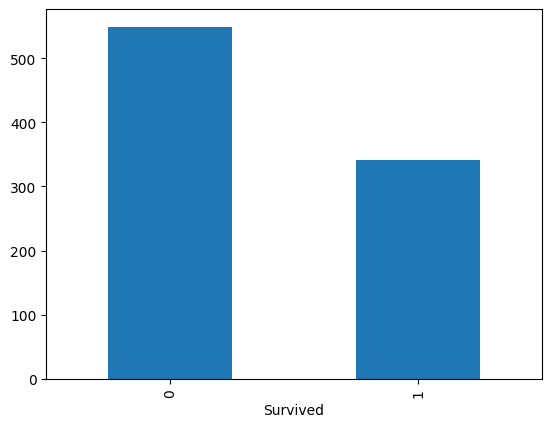

In [30]:
import seaborn as sns
# sns.countplot(df['Survived'])
df['Survived'].value_counts().plot(kind='bar')

<Axes: xlabel='Pclass', ylabel='count'>

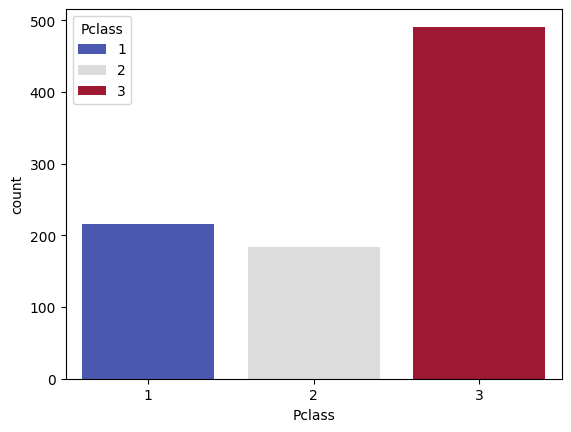

In [31]:
# sns.countplot(df['Pclass'])
sns.countplot(data=df, x='Pclass', hue='Pclass', palette='coolwarm')


<Axes: xlabel='Sex', ylabel='count'>

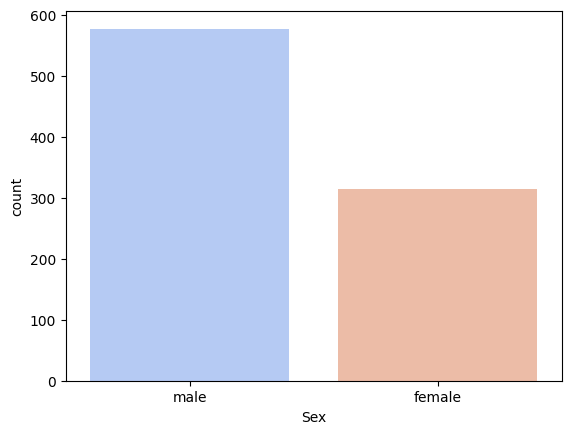

In [32]:
sns.countplot(data=df, x='Sex', hue='Sex', palette='coolwarm')

# **b. PieChart**

<Axes: ylabel='count'>

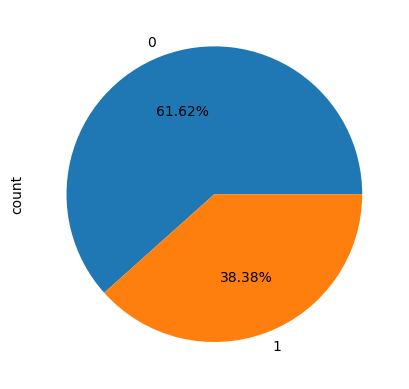

In [33]:
df['Survived'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='count'>

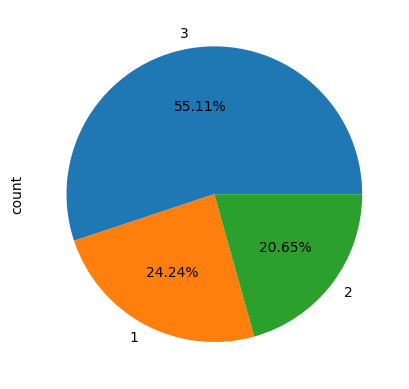

In [34]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.2f%%')

## 2. Numerical Data

# a. Histogram

<Axes: >

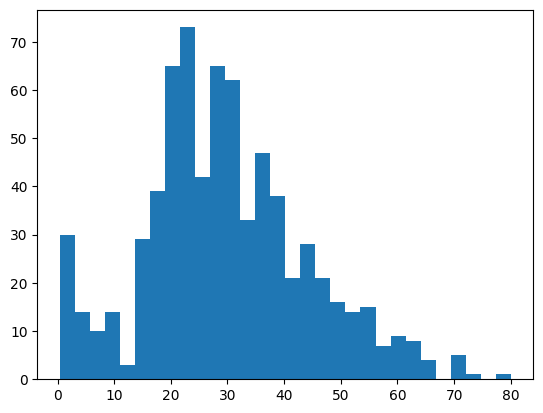

In [35]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins =30)

sns.countplot()

# **b. Distplot**

<ipython-input-36-baea496650fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

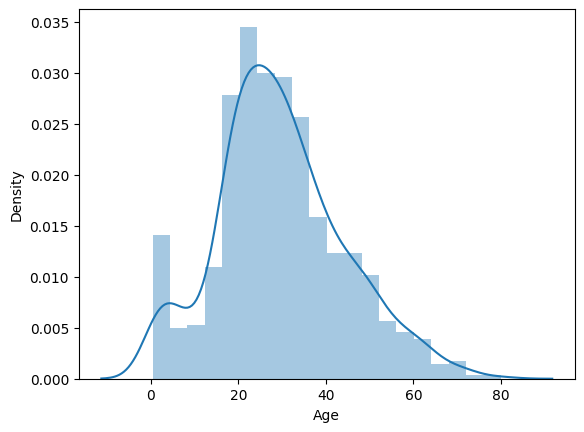

In [36]:
sns.distplot(df['Age'])
# combining a histogram with a kernel density estimate (KDE).

# **c. Boxplot**

<Axes: ylabel='Age'>

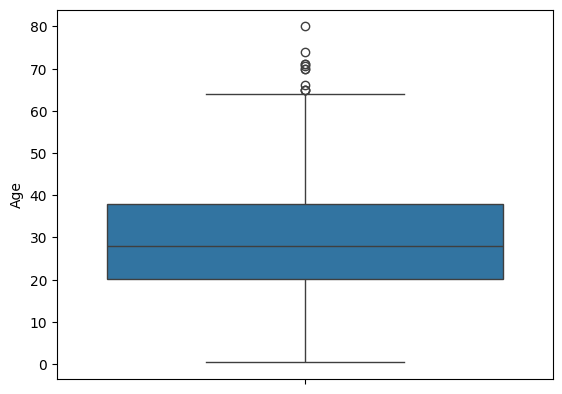

In [37]:
# Box plots help detect outliers easily. If you see individual points far from the whiskers, they are potential outliers.
sns.boxplot(df['Age'])

In [ ]:
# Calculate the skewness
df['Age'].skew()

0.38910778230082704

## 1. Scatterplot - (Numerical- Numerical)

<Axes: xlabel='Age', ylabel='Fare'>

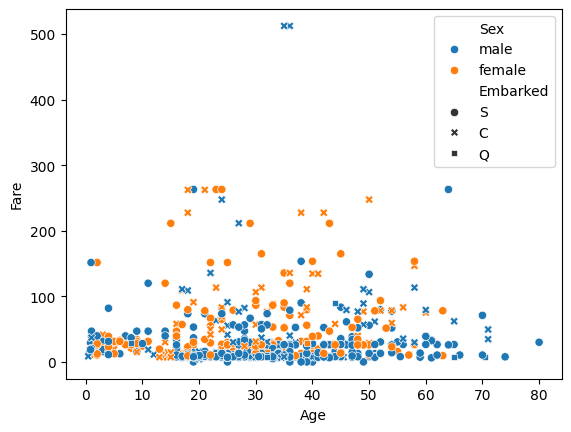

In [38]:
sns.scatterplot(x=df['Age'], y=df['Fare'],hue=df['Sex'],style=df['Embarked'] )

## 2. Barplot (Numerical - Categorical)

<Axes: xlabel='Pclass', ylabel='Age'>

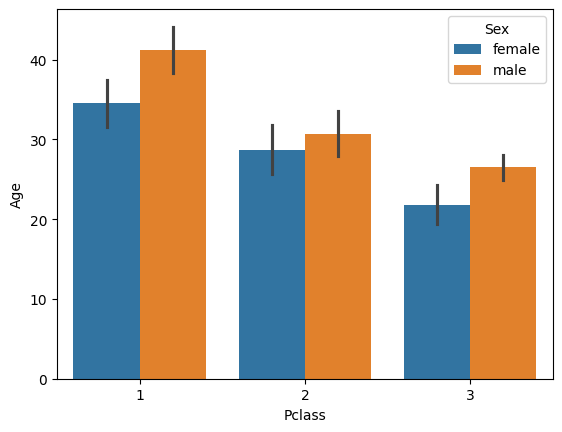

In [39]:
sns.barplot(x='Pclass',y='Age', data=df, hue='Sex')

## 3. Box Plot(Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

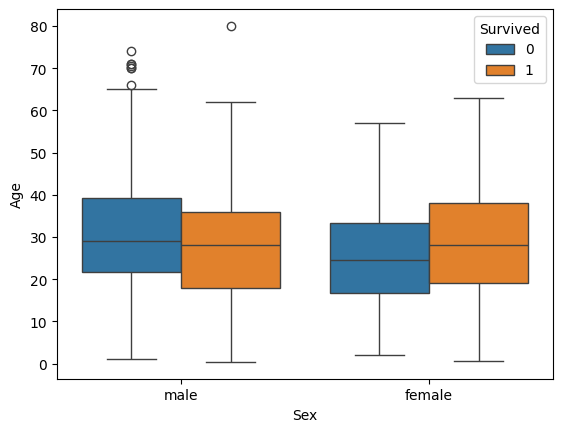

In [40]:
sns.boxplot(x='Sex',y='Age', data=df,hue='Survived')

## 4. Distplot(Numerical - Categorical)

<ipython-input-41-8242e9425cee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Survived']==0],hist=False)
<ipython-input-41-8242e9425cee>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'] [df['Survived']==1],hist=False)


<Axes: xlabel='Age', ylabel='Density'>

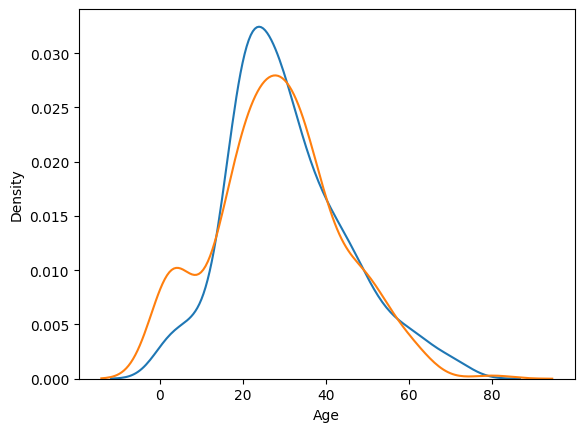

In [41]:
sns.distplot(df['Age'][df['Survived']==0],hist=False)
sns.distplot(df['Age'] [df['Survived']==1],hist=False)
 # blue line - die

# 5. HeatMap(Categorical - Categorical)

<Axes: xlabel='Survived', ylabel='Pclass'>

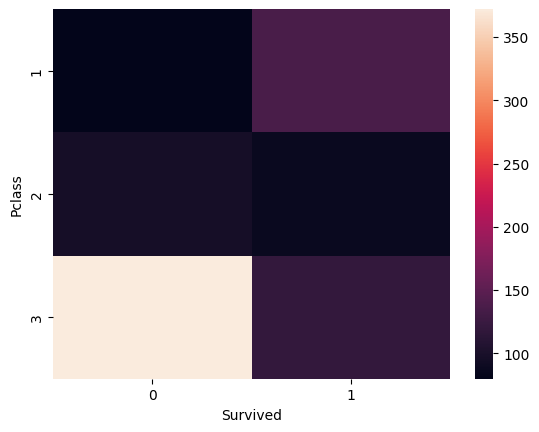

In [42]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

<Axes: xlabel='Pclass'>

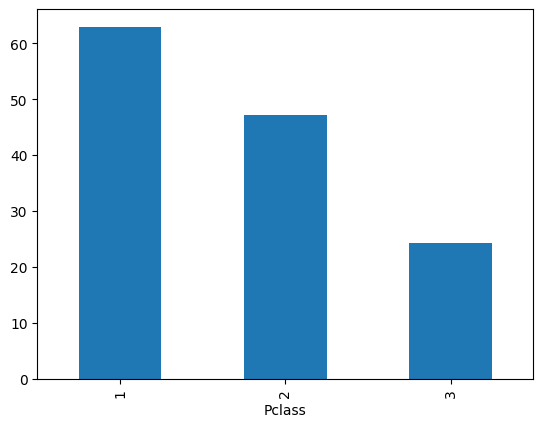

In [43]:

(df.groupby('Pclass')['Survived'].mean() * 100).plot(kind='bar')

## Sklearn
- Function Transformer
- Power Transformer

In [44]:
import pandas as pd
import numpy as np

import scipy.stats as stats   ##QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

In [45]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [46]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [48]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-48-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [49]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [50]:
x = df.iloc[:,1:3]  #Age , Fare
y= df.iloc[:,0]      #Survived

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-52-66fded98fb61>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


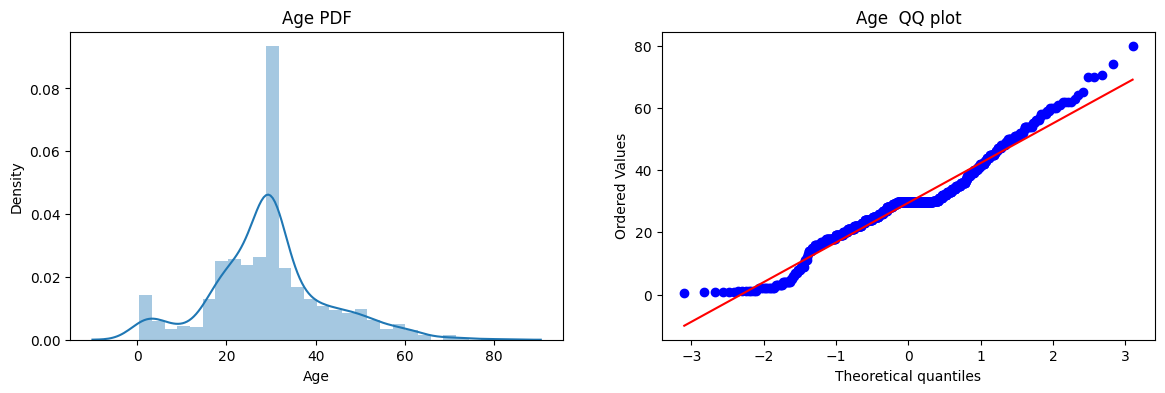

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
#This function generates a Quantile-Quantile (QQ) plot
# to check if the "Age" column follows a normal distribution.
plt.title("Age  QQ plot")
plt.show()

## Fare is right-skewed

<ipython-input-10-8fc5e803317b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


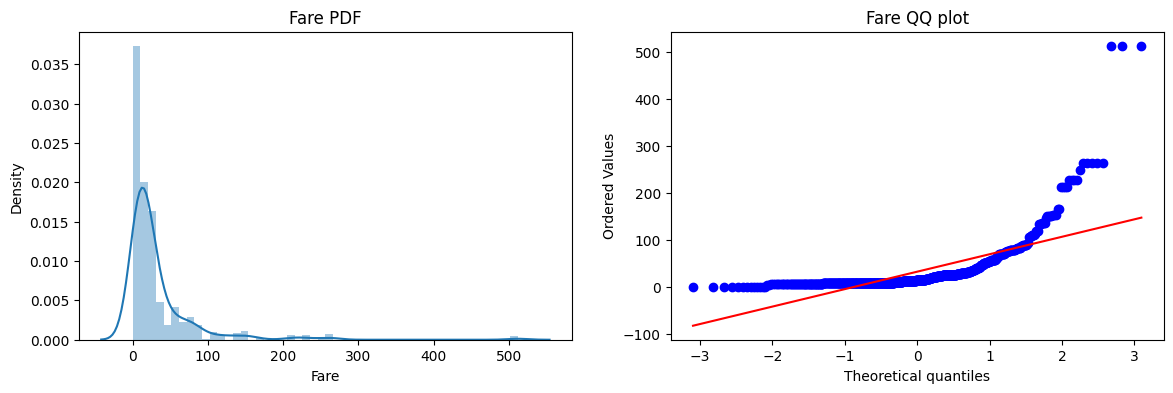

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
#This function generates a Quantile-Quantile (QQ) plot
# to check if the "Age" column follows a normal distribution.
plt.title("Fare QQ plot")
plt.show()

## You performed Logistic Regression and Decision Tree algorithms on the Titanic dataset because both are commonly used for classification problems, specifically binary classification (e.g., "Survived" vs. "Not Survived"). Here’s why these two models were chosen:

##Logistic Regression (LogisticRegression())
- Logistic Regression assumes linear relationships between independent variables and the log-odds of the target variable.
- If a predictor (e.g., "Age" or "Fare") is right-skewed, it can create outliers, which may affect the model’s performance.
- Solution: Apply log transformation or standardization to make it closer to a normal distribution.

##Decision Tree Classifier (DecisionTreeClassifier())
- Decision Trees do not assume any distribution of the data.
- They split data based on feature values, making them robust to right-skewed data.
- Unlike Logistic Regression, Decision Trees do not require transformations because they simply create decision boundaries at different points.

In [54]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Example:

#           [Fare < 50]
#          /           \
#       Yes             No
#     [Age < 30]     Survived (1)
#    /         \
#   No         Yes
# Survived(0)  Survived(1)

'''
If Fare ≥ 50, we predict Survived (1) directly.
This means passengers who paid higher fares
had higher survival rates (first-class passengers).
 '''

'''
If a passenger was younger than 30 and had Fare < 50,
they had a higher survival rate.
 '''

'\nIf a passenger was younger than 30 and had Fare < 50, \nthey had a higher survival rate.\n '

In [55]:
clf.fit(x_train,y_train)  # Train Logistic Regression
clf2.fit(x_train,y_train) # Train Decision Tree

# clf (Logistic Regression) → Learns the probability of survival based on Age & Fare
# clf2 (Decision Tree Classifier) → Learns the rules from data (e.g., "If Fare > 50, Survive").

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)


# y_pred (Logistic Regression says) → [0, 1]
# Predicts Frank = Not Survived (0)
# Predicts Grace = Survived (1)

# y_pred2 (Decision Tree says) → [1, 1]
# Predicts Frank = Survived (1)
# Predicts Grace = Survived (1)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


## Log Transformation


In [56]:
trf = FunctionTransformer(np.log1p)


In [14]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [57]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_trf, y_train)
clf2.fit(x_train_trf,y_train)

#x_train_trf → Transformed training data (features like Age, Fare, etc.).
#y_train → The actual survival labels (1 = survived, 0 = not survived).

y_pred = clf.predict(x_test_trf)
y_pred2 = clf2.predict(x_test_trf)

# clf.predict(X) → Uses Logistic Regression to predict survival for new passengers (x_test_trf).
# clf2.predict(X) → Uses Decision Tree to predict survival for new passengers (x_test_trf).

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


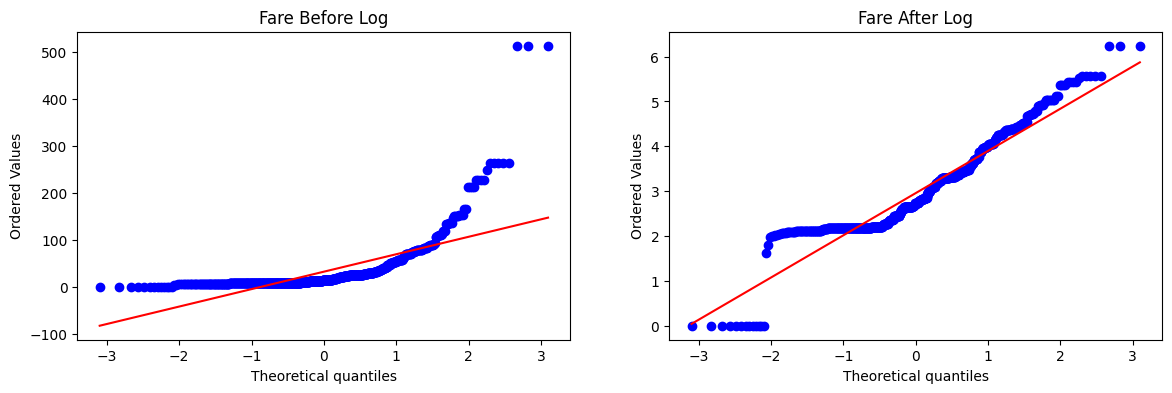

In [17]:
plt.figure(figsize =(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist ="norm", plot= plt)
plt.title("Fare Before Log")

plt.subplot(122)
stats.probplot(x_train_trf['Fare'],dist ="norm", plot= plt)
plt.title("Fare After Log")


plt.show()


Text(0.5, 1.0, 'Age After Log')

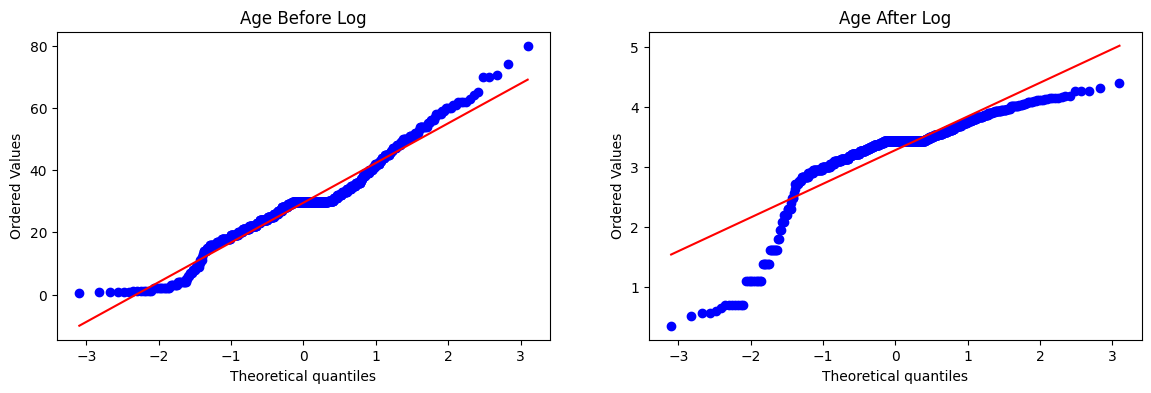

In [58]:
plt.figure(figsize =(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist ="norm", plot= plt)
plt.title("Age Before Log")

plt.subplot(122)
stats.probplot(x_train_trf['Age'],dist ="norm", plot= plt)
plt.title("Age After Log")

In [23]:
from sklearn.compose import ColumnTransformer
def apply_transform(transform):
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([
      ('log', FunctionTransformer(transform), ['Fare']), # Define the log transformer for 'Fare' column
      ('passthrough', 'passthrough', ['Age'])  # Explicitly define passthrough for 'Age'
  ])
  # trf =ColumnTransformer(['log', FunctionTransformer(transform),['Fare']],remainder='passthrough')
  X_trans = trf.fit_transform(X)

  clf = LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(x_train['Fare'],dist ="norm", plot= plt)
  plt.title("Fare  Before Transformation")

  plt.subplot(122)
  stats.probplot(x_train_trf['Fare'],dist ="norm", plot= plt)
  plt.title("Fare After Transformation")

  plt.show()


##Square

Accuracy 0.6431335830212235


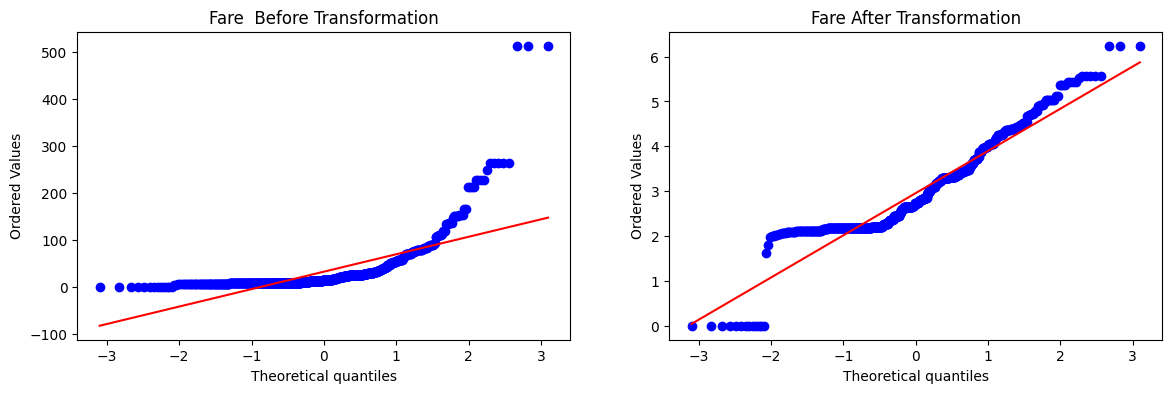

In [26]:
apply_transform(lambda x:x**2)

##Square root

Accuracy 0.6589013732833957


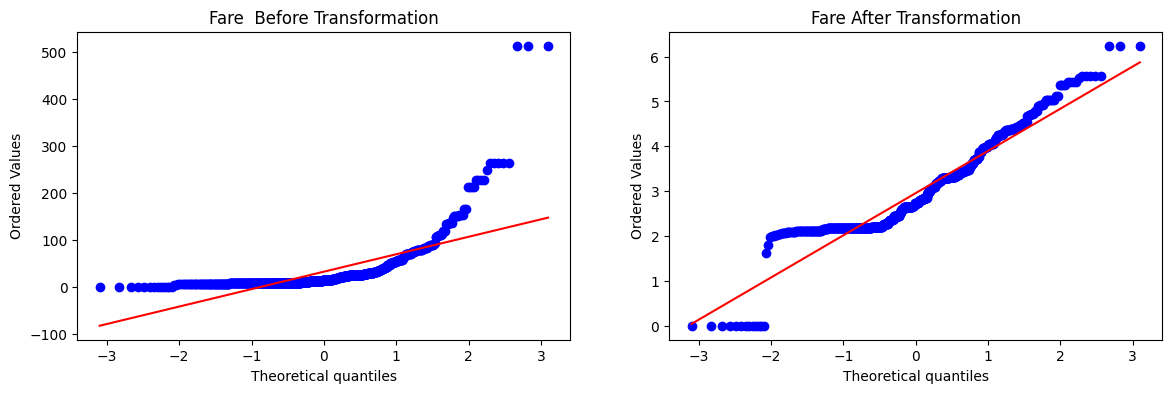

In [27]:
apply_transform(lambda x:x**1/2)

##Reciprocal

Accuracy 0.61729088639201


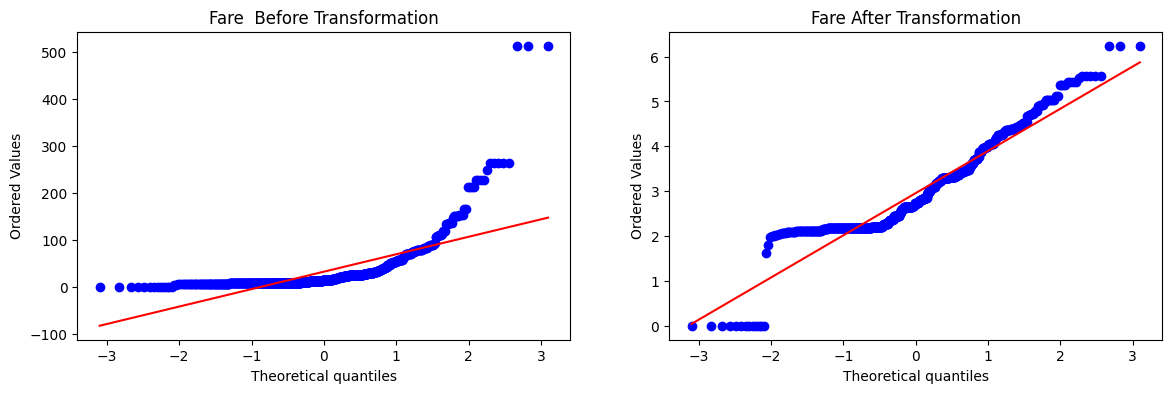

In [28]:
apply_transform(lambda x:1/(x+0.1))

## Random -forest
- Decision Trees tend to overfit, especially on small datasets.
- Random Forest reduces overfitting by creating multiple trees and averaging their predictions.
- Logistic Regression assumes a linear relationship between features and the target.
- Decision Trees handle non-linearity but might not generalize well.
- **Random Forest captures complex, non-linear relationships without overfitting too much.**

In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [60]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

## Classification data

In [61]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.358163,-0.911171,0.421644,-2.358972,-1.116997,0
1,1.051497,0.027452,-0.218011,-0.880042,-0.272944,1
2,0.778933,2.646232,0.702321,-0.276611,-1.599848,1
3,-0.714028,-3.365043,-2.321249,-1.306710,2.182398,0
4,2.238335,3.160262,0.008321,-0.468046,-1.235993,1


In [62]:
# function for row sampling
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]), random_state=42)

In [63]:
#function for feature sampling
import random
def sample_features(df,percent):
    cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
    new_df = df[cols]
    new_df['target'] = df['target']
    return new_df

In [64]:
#function for combined sampling
def combined_sampling(df, row_percent, col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

## Creating the 3 Decision trees

In [65]:
df1 =sample_rows(df,0.2)

In [66]:
df2 = sample_rows(df,0.2)

In [67]:
df3 = sample_rows(df,0.2)

In [68]:
df3.shape

(20, 6)

## Train the model

In [69]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [70]:
 clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
 clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
 clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.875, 'x[2] <= -0.301\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= -1.938\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[4] <= -0.54\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

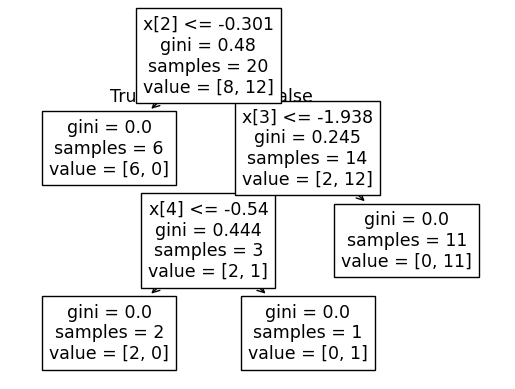

In [71]:
from sklearn.tree import  plot_tree
plot_tree(clf1)

[Text(0.4, 0.875, 'x[2] <= -0.301\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= -1.938\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[2] <= 1.243\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

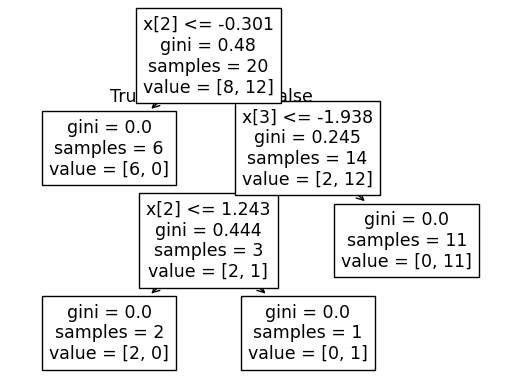

In [72]:
plot_tree(clf2)

[Text(0.4, 0.875, 'x[2] <= -0.301\ngini = 0.48\nsamples = 20\nvalue = [8, 12]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= -1.938\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[2] <= 1.243\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]')]

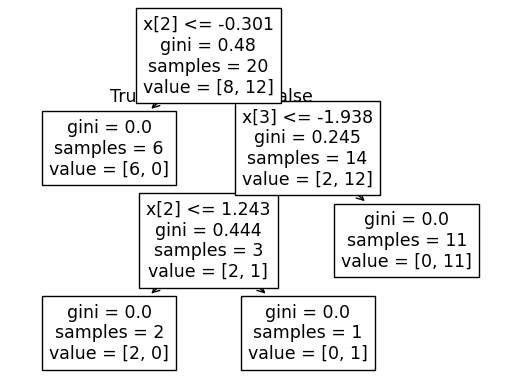

In [73]:
plot_tree(clf3)

In [74]:
clf1.predict(np.array([-0.957154,	-0.085937,	-3.618850,	2.842151,	-3.143182	]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [75]:
clf2.predict(np.array([-0.957154, -0.085937,  -3.618850,  2.842151, -3.143182 ]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [76]:
clf3.predict(np.array([-0.957154, -0.085937,  -3.618850,  2.842151, -3.143182 ]).reshape(1,5))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [78]:
df1 = sample_features(df,0.8)

<ipython-input-63-9037c2bae6ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [77]:
df2 = sample_features(df,0.8)

<ipython-input-63-9037c2bae6ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [79]:
df3 = sample_features(df,0.8)

<ipython-input-63-9037c2bae6ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [80]:
df3.shape

(100, 5)

In [81]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col2', 'col4', 'col1', 'target'], dtype='object')
Index(['col4', 'col1', 'col5', 'col3', 'target'], dtype='object')
Index(['col1', 'col3', 'col2', 'col4', 'target'], dtype='object')


In [82]:
df3

,col1,col3,col2,col4,target
0,-1.358163,0.421644,-0.911171,-2.358972,0
1,1.051497,-0.218011,0.027452,-0.880042,1
2,0.778933,0.702321,2.646232,-0.276611,1
3,-0.714028,-2.321249,-3.365043,-1.306710,0
4,2.238335,0.008321,3.160262,-0.468046,1
...,...,...,...,...,...
95,1.039009,1.391667,0.437098,-0.658333,1
96,-0.984037,-0.949939,-2.802174,-2.093864,0
97,1.843331,-1.320930,2.702588,-2.078056,1
98,-0.289138,-1.175562,-2.618176,-1.752980,0


In [83]:
 clf1.fit(df1.iloc[:,0:4],df1.iloc[:,-1])
 clf2.fit(df2.iloc[:,0:4],df2.iloc[:,-1])
 clf3.fit(df3.iloc[:,0:4],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.7, 0.9375, 'x[3] <= 0.553\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.6333333333333333, 0.8125, 'x[1] <= 0.797\ngini = 0.403\nsamples = 68\nvalue = [49, 19]'),
 Text(0.6666666666666666, 0.875, 'True  '),
 Text(0.4, 0.6875, 'x[2] <= -1.148\ngini = 0.266\nsamples = 57\nvalue = [48, 9]'),
 Text(0.13333333333333333, 0.5625, 'x[3] <= 0.34\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.06666666666666667, 0.4375, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.2, 0.4375, 'x[2] <= -2.212\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.13333333333333333, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.5625, 'x[1] <= -1.061\ngini = 0.435\nsamples = 25\nvalue = [17, 8]'),
 Text(0.4666666666666667, 0.4375, 'x[2] <= -0.075\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.4, 0.3125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.53333333333

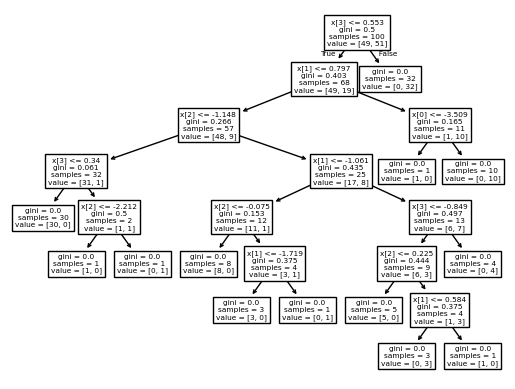

In [84]:
plot_tree(clf1)

[Text(0.625, 0.9166666666666666, 'x[1] <= 0.553\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.5, 0.75, 'x[3] <= 1.308\ngini = 0.403\nsamples = 68\nvalue = [49, 19]'),
 Text(0.5625, 0.8333333333333333, 'True  '),
 Text(0.25, 0.5833333333333334, 'x[1] <= -0.486\ngini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.375, 0.4166666666666667, 'x[1] <= -0.472\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.25, 'x[3] <= 0.254\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.625, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5833333333333334, 'x[0] <= -2.631\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.625, 0.4166666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.875, 0.4166666666666667, 'gini 

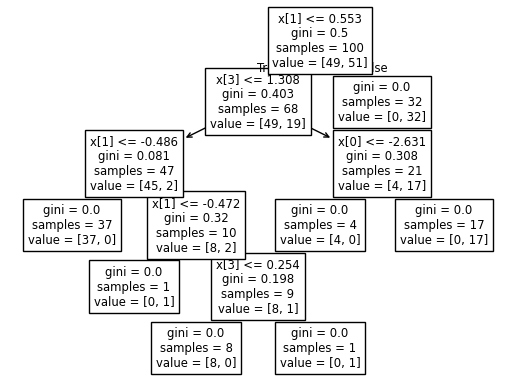

In [85]:
plot_tree(clf2)

[Text(0.6666666666666666, 0.9166666666666666, 'x[0] <= 0.553\ngini = 0.5\nsamples = 100\nvalue = [49, 51]'),
 Text(0.5555555555555556, 0.75, 'x[1] <= 1.308\ngini = 0.403\nsamples = 68\nvalue = [49, 19]'),
 Text(0.6111111111111112, 0.8333333333333333, 'True  '),
 Text(0.3333333333333333, 0.5833333333333334, 'x[2] <= 0.895\ngini = 0.081\nsamples = 47\nvalue = [45, 2]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[0] <= -0.486\ngini = 0.043\nsamples = 46\nvalue = [45, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= -0.472\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4444444444444444, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.5833333333333334, 'x[3] <= -2.631\ngini = 0.308

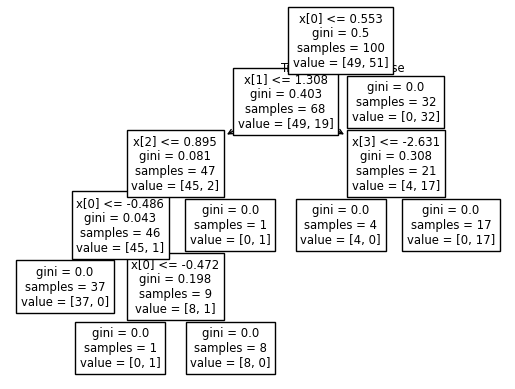

In [86]:
plot_tree(clf3)

In [87]:
clf1.predict(np.array([-1.303797,	-1.458380	,-1.280686,	-2.744715	]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [88]:
clf2.predict(np.array([-1.303797,	-1.458380	,-1.280686,	-2.744715	]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [89]:
clf3.predict(np.array([-1.303797,	-1.458380	,-1.280686,	-2.744715	]).reshape(1,4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

- **Bias** -> When ML model doesn't give good result on the trained model.
- **Variance** -> If I change(new test examples) something in data it will not give good result.

Try -> Low Bias and Variance

  